# Semantic Function Species

In [1]:
from scripts.imports import *

out = Exporter(
    paths['outdir'], 
    'semantics'
)

In [2]:
df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'head_utf8',
       'function', 'quality', 'name', 'text', 'n_times', 'lex_token',
       'is_advb', 'tense', 'firstw', 'genre', 'domain', 'gendom', 'clause',
       'sentence', 'cl_rela', 'cl_type', 'cl_kind', 'verb', 'verb_etcbc',
       'verb_utf8', 'verb_text', 'verbform', 'verb_stem', 'cl_args',
       'has_objc', 'has_cmpl', 'has_subj', 'has_oc', 'Time Position',
       'cl_type2', 'cl_nsuccs', 'cl_clust50', 'cl_clust10', 'verbtense',
       'vt_order', 'PP', 'front', 'ph_type', 'unmodified', 'has_time', 'APPO',
       'DEF', 'ORDN', 'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON',
       'demon_type', 'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1',
       'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [3]:
df.shape

(3648, 72)

# ! TODO ! : Clean these up!

* Check on KL HJWM and equivalents; Haspelmath suggests that 'every' be rendered as equivalent to "[in] every February"; I have tagged these as habituals; i.e. habital simultaneous—maybe that is right. But I should be sure. Also, where might KL indicate a duration instead?
* מתי look at this ehad with simul L; prob remove it
* todo: remove 472789 as this is emotive, not a location

In [4]:
df.function.value_counts()

simultaneous                                 1947
atelic_ext                                    576
anterior_dur                                  434
posterior                                     225
posterior_dur                                  66
habitual                                       62
begin_to_end                                   55
purposive_ext                                  34
simultaneous + atelic_ext                      24
anterior_dur_past?                             21
multi_simuls                                   18
regular_recurrence                             18
anterior                                       18
anterior_dur_purposive                         15
telic_ext                                      14
dist_fut                                        6
begin_to_end_habitual                           6
dist_posterior                                  6
simul_to_end                                    6
habitual?                                       6


## Main Function Analysis

In [6]:
df_main = df[df.mainfunction==1]

out.number(
    df_main.shape[0],
    'total_main'
)

'3,351'

In [7]:
# get a freq count
qual_ct = df_main.quality.value_counts(ascending=False)
qual_pr = (qual_ct / qual_ct.sum())
qual_pr_str = (qual_pr.round(2) * 100).astype(int).astype(str) + '%'
qual_vals = pd.concat([qual_ct, qual_pr_str], 1).T\
    .set_axis(['freq.', 'perc.'], 0)\

out.table(
    qual_vals,
    'qual_counts',
    caption='Frequencies of Primary Time Qualities'
)

qual_vals

,location,duration,sequence,iteration
freq.,1947,1076,243,62
perc.,59%,32%,7%,2%


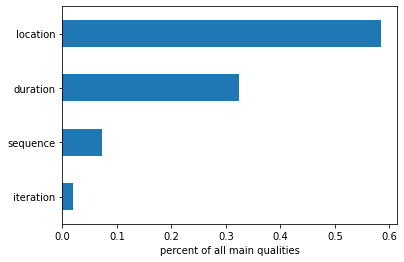

In [8]:
fig, ax = plt.subplots()
qual_pr.sort_values().plot(kind='barh', ax=ax)
ax.set_xlabel('percent of all main qualities')
out.plot(
    'bar_qual_perc',
)

In [9]:
# export numbers for each quality
for qual in qual_vals.columns:
    Nqual = qual_vals[qual]['freq.']
    Pqual = qual_vals[qual]['perc.'].replace('%', '')
    out.number(Nqual, f'N_{qual}')
    out.text(Pqual, f'P_{qual}')

In [10]:
# get a freq count
funct_ct = df_main.function.value_counts(ascending=False)
funct_pr = (funct_ct / funct_ct.sum())
funct_pr_str = (funct_pr.round(2) * 100).astype(int).astype(str) + '%'
funct_vals = pd.concat([funct_ct, funct_pr_str], 1).T\
    .set_axis(['freq.', 'perc.'], 0)\

out.table(
    funct_vals,
    'funct_counts',
    caption='Frequencies of Primary Time Functions',
    adjustbox=True,
)

funct_vals

,simultaneous,atelic_ext,anterior_dur,posterior,posterior_dur,habitual,anterior,telic_ext,dist_fut,dist_past
freq.,1947,576,434,225,66,62,18,14,6,3
perc.,57%,17%,13%,7%,2%,2%,1%,0%,0%,0%


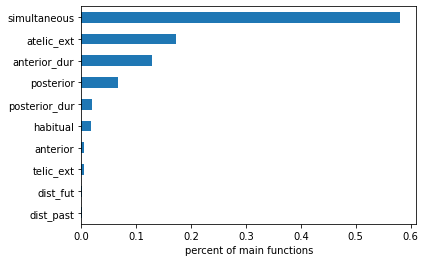

In [11]:
fig, ax = plt.subplots()
funct_pr.sort_values().plot(kind='barh', ax=ax)
ax.set_xlabel('percent of main functions')
out.plot(
    'bar_funct_perc',
)

In [12]:
top4_perc = 100*funct_pr.loc['simultaneous':'posterior'].sum()
out.number(
    top4_perc,
    'top4_perc',
)

top4_perc

94.95672933452701

In [13]:
# export numbers for each main
for funct in funct_vals.columns:
    Nfunct = funct_vals[funct]['freq.']
    Pfunct = funct_vals[funct]['perc.'].replace('%', '')
    out.number(Nfunct, f'N_{funct}')
    out.text(Pfunct, f'P_{funct}')

# Export All Fronts

In [14]:
abbrevs = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'habitual': ['hab', 'Habitual'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent']
}

funct2data = {}

for function, namedata in abbrevs.items():
    abbrev, full = namedata
    funct_df = df_main[df_main.function == function]
    front_cts = pd.DataFrame(
        funct_df['front'].value_counts()
    )
    front_cts = front_cts.rename_axis(index='front').set_axis(['count'], 1)
    front_prs = front_cts / front_cts.sum()
    front_cp = join_ct_pr(front_cts, front_prs)
    
    funct2data[function] = {
        'df': funct_df,
        'ct':front_cts,
        'pr':front_prs,
        'cp':front_cp,
    }
    
    print(function)
    display(
        out.table(
            front_cp,
            f'{abbrev}_front',
            caption=f'Attested {full} Forms in Sample',
            hebindex=True,
        )
    )

simultaneous


,count,percent
\texthebrew{ב},1081,56%
\texthebrew{עתה},349,18%
\texthebrew{Ø},293,15%
\texthebrew{אז},64,3%
\texthebrew{ל},42,2%
\texthebrew{כ},35,2%
\texthebrew{מחר},32,2%
\texthebrew{ב+אחרית},15,1%
\texthebrew{בין},7,0%
\texthebrew{יומם},5,0%


anterior_dur


,count,percent
\texthebrew{עד},279,64%
\texthebrew{ל},152,35%
\texthebrew{עד+ל},3,1%


anterior


,count,percent
\texthebrew{ל+פנה},8,44%
\texthebrew{ל},5,28%
\texthebrew{טרם},4,22%
\texthebrew{ל+פנה+מן},1,6%


atelic_ext


,count,percent
\texthebrew{Ø},521,90%
\texthebrew{תמיד},31,5%
\texthebrew{יומם},13,2%
\texthebrew{ל},5,1%
\texthebrew{כ},2,0%
\texthebrew{את},2,0%
\texthebrew{רביעי},1,0%
\texthebrew{נצח},1,0%


habitual


,count,percent
\texthebrew{ל},21,34%
\texthebrew{Ø},20,32%
\texthebrew{ב},17,27%
\texthebrew{מן},3,5%
\texthebrew{בין},1,2%


posterior


,count,percent
\texthebrew{אחר},128,57%
\texthebrew{Ø},33,15%
\texthebrew{מן},33,15%
\texthebrew{מן+קץ},18,8%
\texthebrew{מן+קצה},10,4%
\texthebrew{מן+אחר},2,1%
\texthebrew{מן+קצת},1,0%


posterior_dur


,count,percent
\texthebrew{מן},63,95%
\texthebrew{מן+תחלה},1,2%
\texthebrew{ל+מן},1,2%
\texthebrew{מן+ל},1,2%


telic_ext


,count,percent
\texthebrew{ב},8,57%
\texthebrew{Ø},6,43%


### Examples

#### Simul

In [15]:
simdf = funct2data['simultaneous']['df']

In [16]:
out.number(
    funct2data['simultaneous']['pr'].loc['ב'][0]*100,
    'perc_sim_B'
)

'56'

In [17]:
get = 'Ø'
out.number(
    funct2data['simultaneous']['pr'].loc[get][0]*100,
    'perc_sim_Ø'
)

'15'

In [18]:
nulldef_ct = simdf[simdf.front == 'Ø'].DEF.value_counts()
nulldef_pr = nulldef_ct / nulldef_ct.sum()

nulldef_pr

1.0    0.83959
0.0    0.16041
Name: DEF, dtype: float64

In [19]:
out.number(
    nulldef_pr[1]*100,
    'nulldef_pr'
)

'84'

#

In [20]:
null_nodef = simdf[
    (simdf.front == 'Ø')
    & (simdf.DEF == 0)
]

out.number(
    null_nodef.shape[0],
    'n_null_nodef'
)

ts.show(
    null_nodef
, extra=['function', 'times_utf8'], spread=10)

showing 10 of 47


,verse,clause,verb_utf8,function,times_utf8
node,,,,,
428652,Genesis 14:4,וּשְׁלֹשׁ־עֶשְׂרֵ֥ה שָׁנָ֖ה מָרָֽדוּ׃,מרד,simultaneous,שׁנה
442052,Numbers 11:9,בְרֶ֧דֶת הַטַּ֛ל עַל־הַֽמַּחֲנֶ֖ה לָ֑יְלָה,ירד,simultaneous,לילה
452297,Judges 9:32,ק֣וּם לַ֔יְלָה אַתָּ֖ה וְהָעָ֣ם,קום,simultaneous,לילה
457391,1_Samuel 26:7,וַיָּבֹא֩ דָוִ֨ד וַאֲבִישַׁ֥י׀ אֶל־הָעָם֮ לַיְלָה֒,בוא,simultaneous,לילה
465833,2_Kings 7:12,וַיָּ֨קָם הַמֶּ֜לֶךְ לַ֗יְלָה,קום,simultaneous,לילה
485724,Hosea 4:5,וְכָשַׁ֧ל גַּם־נָבִ֛יא עִמְּךָ֖ לָ֑יְלָה,כשׁל,simultaneous,לילה
490340,Psalms 5:4,בֹּ֖קֶר תִּשְׁמַ֣ע קֹולִ֑י,שׁמע,simultaneous,בקר
493512,Psalms 69:14,תְפִלָּתִֽי־לְךָ֨׀ עֵ֤ת רָצֹ֗ון,nan,simultaneous,עת
499835,Job 34:25,וְהָ֥פַךְ לַ֝֗יְלָה,הפך,simultaneous,לילה


In [21]:
nndef_timects = null_nodef.times_utf8.value_counts()
nndef_timeprs = nndef_timects / nndef_timects.sum()

nndef_timects

לילה       31
יום         5
בקר         3
עת          2
חדשׁ        1
רגע|יום     1
צהרים       1
שׁנה        1
רגע         1
מחר|עת      1
Name: times_utf8, dtype: int64

In [22]:
out.number(
    nndef_timeprs['לילה']*100,
    'nndef_night_pr',
)

'66'

In [23]:
out.number(
    nndef_timects['לילה'],
    'nndef_night_ct',
)

'31'

In [24]:
out.number(
    nndef_timects['יום'],
    'nndef_day_ct',
)

'5'

In [25]:
out.number(
    nndef_timects['בקר'],
    'nndef_morning_ct',
)

'3'

### Phrase types

In [26]:
abbrevs = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'habitual': ['hab', 'Habitual'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent']
}

for function, namedata in abbrevs.items():
    abbrev, full = namedata
    phtype_cts = pd.DataFrame(
        df_main[df_main.function == function]['ph_type'].value_counts()
    )
    phtype_cts = phtype_cts.rename_axis(index='Phrase Type').set_axis(['count'], 1)
    phtype_prs = phtype_cts / phtype_cts.sum()
    phtype_cp = join_ct_pr(phtype_cts, phtype_prs)
    
    print(function)
    display(
        out.table(
            phtype_cp,
            f'{abbrev}_phtype_ct',
            caption=f'Attested {full} Phrase Types in Sample',
        )
    )

simultaneous


,count,percent
Phrase Type,,
PP,1196,61%
ADVB,458,24%
NP,293,15%


anterior_dur


,count,percent
Phrase Type,,
PP,434,100%


anterior


,count,percent
Phrase Type,,
PP,14,78%
ADVB,4,22%


atelic_ext


,count,percent
Phrase Type,,
NP,521,90%
ADVB,46,8%
PP,9,2%


habitual


,count,percent
Phrase Type,,
PP,42,68%
NP,20,32%


posterior


,count,percent
Phrase Type,,
PP,158,70%
ADVB,34,15%
NP,33,15%


posterior_dur


,count,percent
Phrase Type,,
PP,66,100%


telic_ext


,count,percent
Phrase Type,,
PP,8,57%
NP,6,43%


## Examples for Simultaneous

In [27]:
simul_L = simdf[simdf.front == 'ל']

out.number(
    simul_L.shape[0],
    'n_simul_L'
)

'42'

In [28]:
ts.show(simul_L, extra=['front'])

showing 25 of 42


,verse,clause,verb_utf8,front
node,,,,
427805,Genesis 3:8,מִתְהַלֵּ֥ךְ בַּגָּ֖ן לְר֣וּחַ הַיֹּ֑ום,הלך,ל
428223,Genesis 8:11,וַתָּבֹ֨א אֵלָ֤יו הַיֹּונָה֙ לְעֵ֣ת עֶ֔רֶב,בוא,ל
429008,Genesis 18:14,לַמֹּועֵ֞ד אָשׁ֥וּב אֵלֶ֛יךָ כָּעֵ֥ת חַיָּ֖ה,שׁוב,ל
430522,Genesis 28:19,וְאוּלָ֛ם ל֥וּז שֵׁם־הָעִ֖יר לָרִאשֹׁנָֽה׃,nan,ל
433410,Genesis 49:27,וְלָעֶ֖רֶב יְחַלֵּ֥ק שָׁלָֽל׃,חלק,ל
434331,Exodus 8:6,לְמָחָ֑ר,nan,ל
437249,Exodus 34:18,אֲשֶׁ֣ר צִוִּיתִ֔ךָ לְמֹועֵ֖ד חֹ֣דֶשׁ הָאָבִ֑יב,צוה,ל
458967,2_Samuel 11:2,וַיְהִ֣י׀ לְעֵ֣ת הָעֶ֗רֶב,היה,ל
463418,1_Kings 15:23,רַ֚ק לְעֵ֣ת זִקְנָתֹ֔ו חָלָ֖ה אֶת־רַגְלָֽיו׃,חלה,ל


In [31]:
siml_head_ct = simul_L.head_utf8.value_counts()
siml_head_pr = siml_head_ct / siml_head_ct.sum()
siml_head_cp = join_ct_pr(siml_head_ct, siml_head_pr)

out.table(
    siml_head_cp,
    'siml_head_cp', 
    caption='Semantic Heads of Simultaneous \texthebrew{לְ} Adverbials',
)

,count,percent
עת,10,24%
יום,8,19%
מועד,7,17%
ערב,3,7%
תשׁובה,3,7%
מחר,3,7%
מחרת,2,5%
בקר,1,2%
אחרית,1,2%
ראשׁון,1,2%


In [32]:
ts.show(
    simul_L[simul_L.head_utf8 == 'יום']
)

showing 8 of 8


,verse,clause,verb_utf8
node,,,
428156,Genesis 7:10,וַֽיְהִ֖י לְשִׁבְעַ֣ת הַיָּמִ֑ים,היה
468896,Isaiah 10:3,וּמַֽה־תַּעֲשׂוּ֙ לְיֹ֣ום פְּקֻדָּ֔ה,עשׂה
486026,Hosea 9:5,מַֽה־תַּעֲשׂ֖וּ לְיֹ֣ום מֹועֵ֑ד,עשׂה
486027,Hosea 9:5,וּלְיֹ֖ום חַג־יְהוָֽה׃,nan
490180,Malachi 3:17,וְהָ֣יוּ לִ֗י לַיֹּ֕ום סְגֻלָּ֑ה,היה
498980,Job 21:30,כִּ֤י לְיֹ֣ום אֵ֭יד יֵחָ֣שֶׂךְ רָ֑ע,חשׂך
498981,Job 21:30,לְיֹ֖ום עֲבָרֹ֣ות יוּבָֽלוּ׃,יבל
500932,Proverbs 7:20,לְיֹ֥ום הַ֝כֵּ֗סֶא יָבֹ֥א בֵיתֹֽו׃,בוא


**<L**

In [35]:
ts.show(
    simdf[simdf.front == 'על']
)

showing 2 of 2


,verse,clause,verb_utf8
node,,,
457163,1_Samuel 25:8,כִּֽי־עַל־יֹ֥ום טֹ֖וב בָּ֑נוּ,בוא
509657,Nehemiah 12:22,וְהַכֹּ֣הֲנִ֔ים עַל־מַלְכ֖וּת דָּרְיָ֥וֶשׁ הַפָּֽרְסִֽי׃ פ,nan


In [36]:
ts.show(
    simdf[simdf.front == 'אל']
)

showing 1 of 1


,verse,clause,verb_utf8
node,,,
460937,2_Samuel 23:13,וַיָּבֹ֤אוּ אֶל־קָצִיר֙ אֶל־דָּוִ֔ד אֶל־מְעָרַ֖ת עֲדֻלָּ֑ם,בוא


In [38]:
ts.show(
    simdf[simdf.front == 'רגע']
)

showing 1 of 1


,verse,clause,verb_utf8
node,,,
472789,Isaiah 54:8,בְּשֶׁ֣צֶף קֶ֗צֶף הִסְתַּ֨רְתִּי פָנַ֥י רֶ֨גַע֙ מִמֵּ֔ךְ,סתר


In [37]:
assorted = [
    'יומם',
    'אחרון',
    'ראשׁ', 
    'חצות',
]

ts.show(
    simdf[simdf.front.isin(assorted)]
)

showing 9 of 9


,verse,clause,verb_utf8
node,,,
451807,Judges 6:27,מֵעֲשֹׂ֥ות יֹומָ֖ם,עשׂה
451986,Judges 7:19,וַיָּבֹ֣א גִ֠דְעֹון וּמֵאָה־אִ֨ישׁ בִּקְצֵ֣ה הַֽמַּחֲנֶ֗ה רֹ֚אשׁ הָאַשְׁמֹ֣רֶת הַתִּֽיכֹונָ֔ה,בוא
481047,Ezekiel 12:7,כֵּ֠לַי הֹוצֵ֜אתִי כִּכְלֵ֤י גֹולָה֙ יֹומָ֔ם,יצא
491083,Psalms 22:3,אֶקְרָ֣א יֹ֖ומָם,קרא
494828,Psalms 91:5,יָע֥וּף יֹומָֽם׃,עוף
496291,Psalms 119:62,חֲצֹֽות־לַ֗יְלָה אָ֭קוּם,קום
496593,Psalms 121:6,יֹומָ֗ם הַשֶּׁ֥מֶשׁ לֹֽא־יַכֶּ֗כָּה,נכה
498816,Job 19:25,וְ֝אַחֲרֹ֗ון עַל־עָפָ֥ר יָקֽוּם׃,קום
499821,Job 34:20,וַחֲצֹ֪ות לָ֥יְלָה יְגֹעֲשׁ֣וּ עָ֣ם,געשׁ


# Text Examples